CARICO TERMICO DI CONDUZIONE G10 NORMAL DIRECTION
Li approssimo con cilindretti in realtà sono clessidre: è stima per eccesso. Sono i supporti che ci sono alla base.

L'integrale di conduzione tra 4.0 K e 55.0 K è: 9.2143 W/m


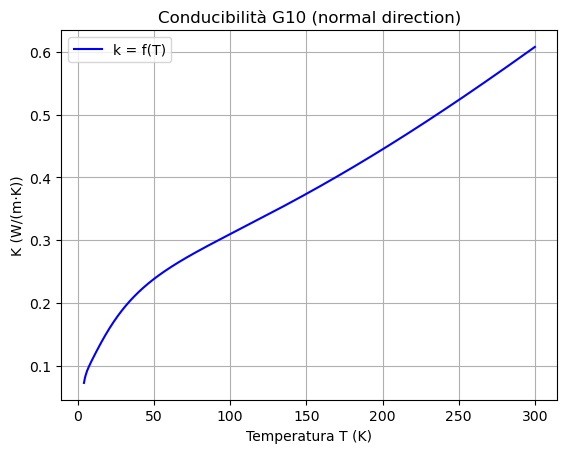

Carico conduzione cilndretti G10:   Q = 7.7194e-02 ± 7.7365e-04W


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Definire i coefficienti
a = -4.1236
b = 13.788
c = -26.068
d = 26.272
e = -14.663
f = 4.4954
g = -0.6905
h = 0.0397
i = 0

# Funzione conducibilità vs Temperatura
def y(T):
    logT = np.log10(T)
    return (10**(a + b*logT + c*logT**2 + d*logT**3 + e*logT**4 + f*logT**5 + g*logT**6 + h*logT**7 + i*logT**8))

 # Funzione per l'integrazione
def integrand(T):
    return y(T)

    

#--------INTEGRALE DI CONDUCIBILITà----------------
# estremi per l'integrazione
T_min = 4.
T_max = 55.

# Controllo se gli estremi sono validi
if T_min < 4 or T_max > 300:
    print("Errore: Gli estremi dell'integrazione devono essere compresi tra 4 K e 300 K.")
else:
# Calcolo dell'integrale solo se gli estremi sono validi
    integral_value, error = quad(integrand, T_min, T_max)
    print(f"L'integrale di conduzione tra {T_min} K e {T_max} K è: {integral_value:.4f} W/m")

# Intervallo di temperatura
T_range = np.linspace(4, 300, 1000)

# Valori di y calcolati
y_values = y(T_range)

# Plot della funzione
plt.plot(T_range, y_values, label='k = f(T)', color='blue')
plt.title('Conducibilità G10 (normal direction)')
plt.xlabel('Temperatura T (K)')
plt.ylabel('K (W/(m·K))')
plt.grid(True)
plt.legend()
plt.show()
#plt.savefig("Carico_conduzione_g10_nist.png")



#--------CARICO CONDUZIONE DA PARAMETRI GEOMETRICI
    # Caratteristiche geometriche cilindretti G10 
diam = 8e-3
sigma_diam = 0.1e-3
l = 30e-3 # lunghezza cilindretti
sigma_l = 0.1e-3
n = 5 # numero di cilindretti

A = np.pi * (diam/2)**2
sigma_A = np.pi * diam * sigma_diam

# Calcolo di Q
Q = A/l * integral_value * n   
sigma_Q = np.sqrt( (1/l*integral_value*sigma_A)**2 + (A/(l*l) *integral_value*sigma_l)**2 )     

# Output del risultato
print(f"Carico conduzione cilndretti G10:   Q = {Q:.4e} ± {sigma_Q:.4e}W")



CARICO TERMICO DI CONDUZIONE G10 WARP DIRECTION (meglio questo)

L'integrale di conduzione tra 4.0 K e 55.0 K è: 11.5787 W/m


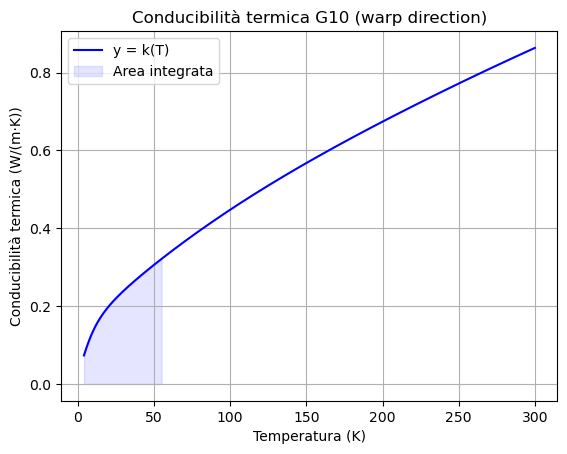

Carico conduzione cilndretti G10:   Q = 9.7001e-02 ± 9.7217e-04W


In [2]:
# ridefinizone coefficienti per warp direction
a = -2.64827
b = 8.80228
c = -24.8998
d = 41.1625
e = -39.8754
f = 23.1778
g = -7.95635
h = 1.48806
i = -0.11701


# Integrale di conducibilità
integral_value, error = quad(integrand, T_min, T_max)
print(f"L'integrale di conduzione tra {T_min} K e {T_max} K è: {integral_value:.4f} W/m")

# Valori di y calcolati
y_values = y(T_range)

# Plot della funzione
plt.plot(T_range, y_values, label='y = k(T)', color='blue')
plt.title('Conducibilità termica G10 (warp direction)')
plt.xlabel('Temperatura (K)')
plt.ylabel('Conducibilità termica (W/(m·K))')
plt.grid(True)
plt.fill_between(T_range, y_values, where=(T_range >= T_min) & (T_range <= T_max), color='blue', alpha=0.1, label="Area integrata")
plt.legend()
plt.savefig("Conducibilità_g10.pdf", format="pdf")
plt.show()

#----CARICO DI CONDUZIONE
# Calcolo di Q
Q = A/l * integral_value * n        
sigma_Q = np.sqrt( (1/l*integral_value*sigma_A)**2 + (A/(l*l) *integral_value*sigma_l)**2 )     

# Output del risultato
print(f"Carico conduzione cilndretti G10:   Q = {Q:.4e} ± {sigma_Q:.4e}W")